In [39]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns


In [40]:
apple = pd.read_csv("/content/sample_data/aapl_us_d.csv")

In [41]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [42]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


In [43]:
apple.shape

(10080, 6)

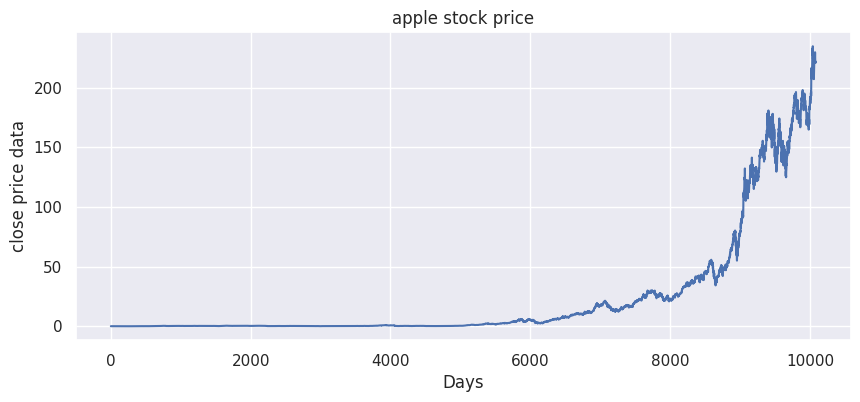

In [44]:
sns.set()
plt.figure(figsize=(10,4))
plt.title("apple stock price")
plt.xlabel("Days")
plt.ylabel("close price data")
plt.plot(apple['Close'])
plt.show()

In [45]:
apple.drop(columns = 'Date',inplace=True)

<ipython-input-46-2ae23b8b2cb4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apple[col])
<ipython-input-46-2ae23b8b2cb4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apple[col])
<ipython-input-46-2ae23b8b2cb4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in s

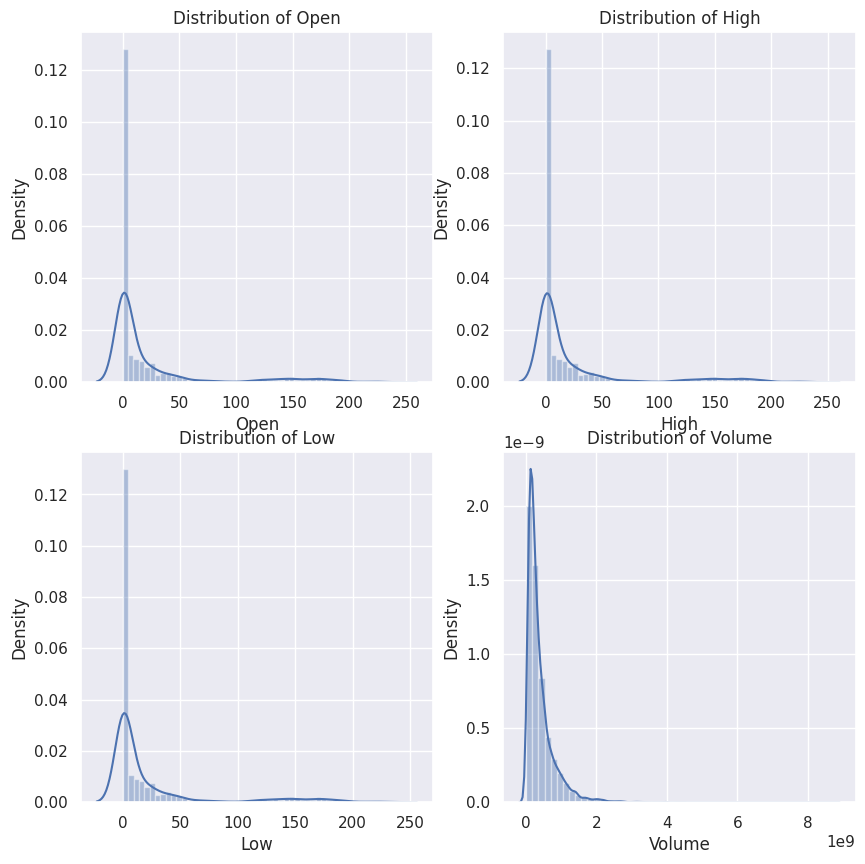

In [46]:
features = ['Open','High','Low','Volume']
plt.figure(figsize=(10,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(apple[col])
  plt.title(f"Distribution of {col}")
plt.show()

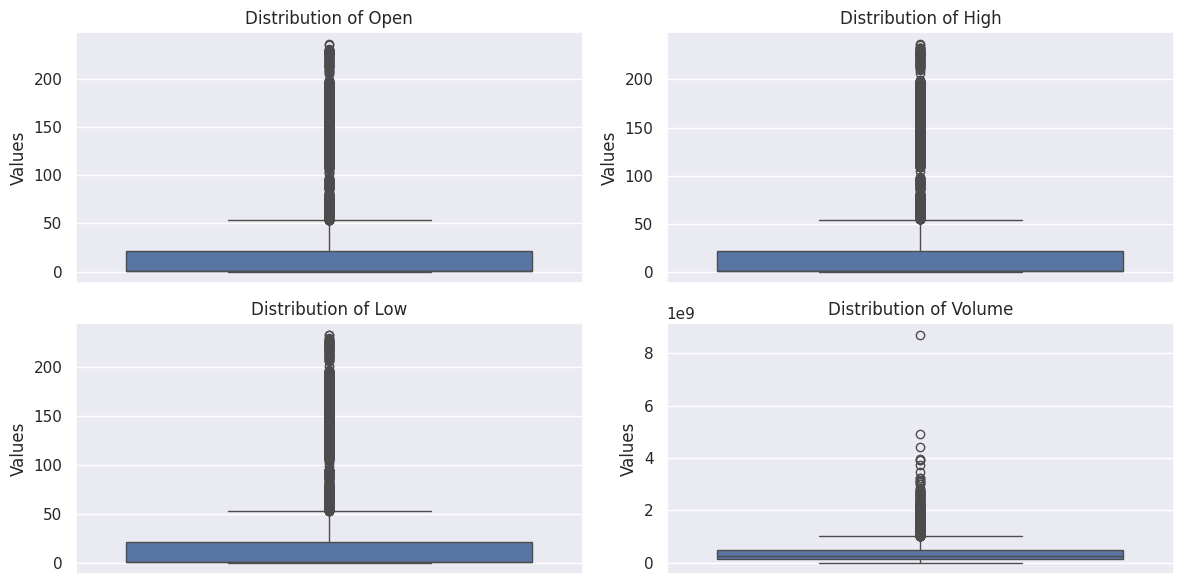

In [47]:
features = ['Open','High','Low','Volume']
plt.figure(figsize=(12,6))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(y = apple[col])
  plt.title(f"Distribution of {col}")
  plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [48]:
features = ['Open','High','Low','Volume']
for i, col in enumerate(features):
  print(f'{col}:',apple[col].skew())

Open: 2.3970365071860154
High: 2.3948224350991363
Low: 2.3989584518471787
Volume: 3.467596867241245


In [49]:
features = ['Open','High','Low','Volume']
for i, col in enumerate(features):
  print(f'{col}:',apple[col].dtype)

Open: float64
High: float64
Low: float64
Volume: float64


In [50]:
features = ['Open','High','Low','Volume']
percentile1 = {}
iqr = {}
percentile3 = {}
UL = {}
LL = {}
for i, col in enumerate(features):
  percentile1[col] = apple[col].quantile(0.25)
  percentile3[col] = apple[col].quantile(0.75)
  iqr[col] = percentile3[col] - percentile1[col]
  UL[col] = percentile3[col] + 1.5*iqr[col]
  LL[col] = percentile1[col] - 1.5*iqr[col]
  upper_outliers = apple[apple[col] > UL[col]]
  lower_outliers = apple[apple[col] < LL[col]]
  print(f'{col} upper limit:',upper_outliers.shape[0])
  print(f'{col} lower limit:' ,lower_outliers.shape[0])

Open upper limit: 1268
Open lower limit: 0
High upper limit: 1264
High lower limit: 0
Low upper limit: 1262
Low lower limit: 0
Volume upper limit: 693
Volume lower limit: 0


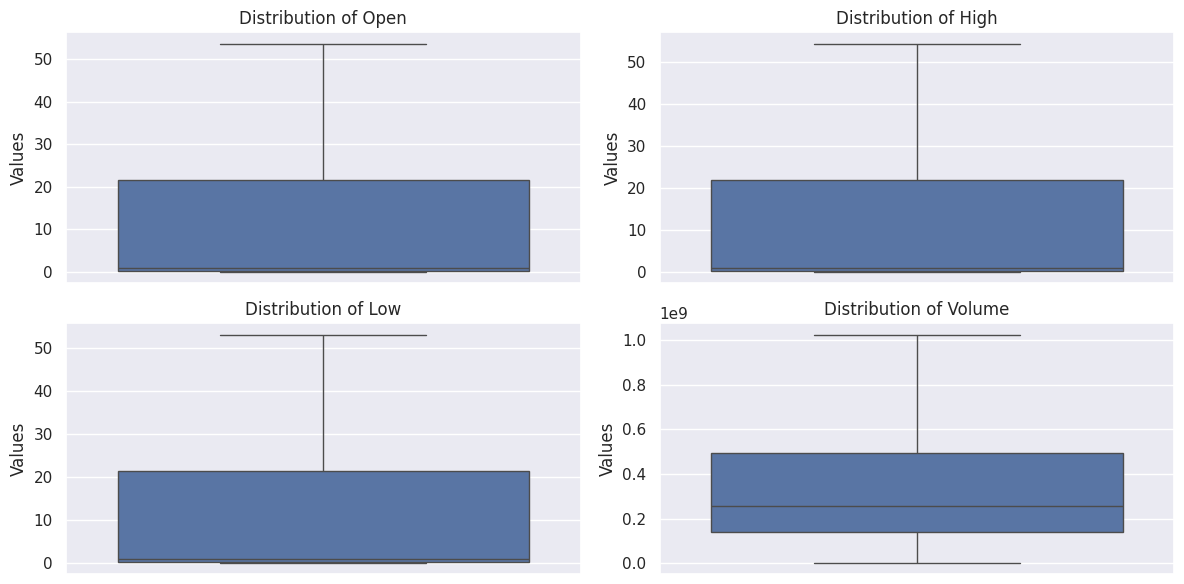

In [51]:
features = ['Open','High','Low','Volume']
percentile1 = {}
iqr = {}
percentile3 = {}
UL = {}
LL = {}
plt.figure(figsize=(12,6))
for i, col in enumerate(features):
  percentile1[col] = apple[col].quantile(0.25)
  percentile3[col] = apple[col].quantile(0.75)
  iqr[col] = percentile3[col] - percentile1[col]
  UL[col] = percentile3[col] + 1.5*iqr[col]
  LL[col] = percentile1[col] - 1.5*iqr[col]
  apple[col] = np.where(apple[col] > UL[col],UL[col],apple[col])
  apple[col] = np.where(apple[col] < LL[col],LL[col],apple[col])
  plt.subplot(2,2,i+1)
  sns.boxplot(y = apple[col])
  plt.title(f"Distribution of {col}")
  plt.ylabel("Values")
plt.tight_layout()
plt.show()

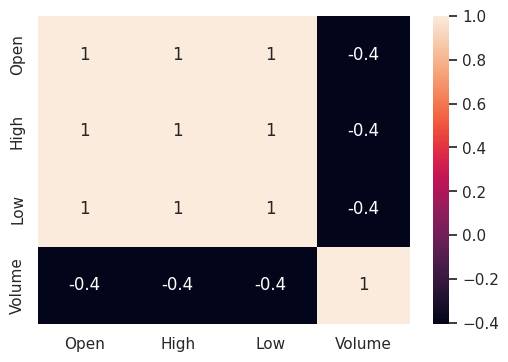

In [54]:
plt.figure(figsize=(6,4))
apple1 = apple.drop(columns='Close')
sns.heatmap(apple1.corr(),annot=True)
plt.show()

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  # Changed to Regressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare the data
X = apple[features]
y = apple[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance:", cumulative_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain ~95% variance: {n_components}")

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA result into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)  # R^2 score
print("LinearRegression Score (R^2):", lr_score)
print("Linear Regression Predictions on Test Set:", y_pred_lr[:5])

# Decision Tree Regressor (since the target is continuous)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)  # Mean Squared Error for regression tasks
dt_r2 = r2_score(y_test, y_pred_dt)  # R^2 score for regression tasks

print("DecisionTreeRegressor MSE:", dt_mse)
print("DecisionTreeRegressor R^2:", dt_r2)
print("Decision Tree Regressor Predictions on Test Set:", y_pred_dt[:5])


Explained variance by each component: [8.04798524e-01 1.95191078e-01 6.57212645e-06 3.82636077e-06]
Cumulative variance: [0.80479852 0.9999896  0.99999617 1.        ]
Number of components to retain ~95% variance: 2
LinearRegression Score (R^2): 0.7713521016964937
Linear Regression Predictions on Test Set: [115.00518031  -3.20425089  -2.2085538   -7.56714624  -3.68109974]
DecisionTreeRegressor MSE: 240.78857256891018
DecisionTreeRegressor R^2: 0.8945300546151824
Decision Tree Regressor Predictions on Test Set: [1.87870e+02 6.12033e-02 2.60555e-01 3.35756e-01 1.65635e-01]


In [64]:
import pickle

# Save the models to disk using Pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_regressor, f)
